<a href="https://colab.research.google.com/github/MoriMorou/GB_Python/blob/master/HW_Lesson_6_SLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Решите линейную систему:
$$\begin{equation*}
\begin{vmatrix}
\mathbf{1}  ; \mathbf{2} ; \mathbf{3} \\
\mathbf{4} ; \mathbf{0} ; \mathbf{6} \\
\mathbf{7} ; \mathbf{8} ; \mathbf{9}
\end{vmatrix} * X = 
\begin{vmatrix}
\mathbf{12} \\
\mathbf{2} \\
\mathbf{1}
\end{vmatrix}
\end{equation*}$$

In [0]:
import numpy as np

In [0]:
A = np.array([[1, 2, 3], [4, 0, 6], [7, 8, 9]])
B = np.array([12, 2, 1])

In [104]:
det_A = np.linalg.det(A)

print(det_A)

59.999999999999986


 Как как определитель матрицы А не равен нулю мы можем найти решение СЛАУ 

In [105]:
X1 = np.linalg.solve(A, B)
X2 = np.dot(np.linalg.inv(A), B)
print(X1)
print(X2)

[-9.2         0.9         6.46666667]
[-9.2         0.9         6.46666667]


Проверка:

In [106]:
print(np.dot(A, X1))
print(np.dot(A, X2))

[12.  2.  1.]
[12.  2.  1.]



2. Найдите псевдорешение:

x + 2y – z = 1

3x – 4y = 7

8x – 5y + 2z = 12

2x – 5z = 7

11x +4y – 7z = 15

In [107]:
A = np.array([[1, 2, -1], [3, -4, 0], [8, -5, 2], [2, 0, -5], [11, 4, -7]])
B = np.array([1, 7, 12, 7, 15])
print(A)

[[ 1  2 -1]
 [ 3 -4  0]
 [ 8 -5  2]
 [ 2  0 -5]
 [11  4 -7]]


In [108]:
print(B)

[ 1  7 12  7 15]


In [109]:
X = np.linalg.lstsq(A, B, rcond=None)[0]
print(X)

[ 1.13919353 -0.90498444 -0.9009803 ]


In [110]:
# проверка
print(np.dot(A, X))

[ 0.23020495  7.03751834 11.83650981  6.78328855 15.21805313]


3. Сколько решений имеет линейная система:
$$\begin{equation*}
\begin{vmatrix}
\mathbf{1} ; \mathbf{2} ; \mathbf{3} \\
\mathbf{4} ; \mathbf{5} ; \mathbf{6} \\
\mathbf{7} ; \mathbf{8} ; \mathbf{9}
\end{vmatrix} * X = 
\begin{vmatrix}
\mathbf{12} \\
\mathbf{2} \\
\mathbf{1}
\end{vmatrix}
\end{equation*}$$

Если ноль – то измените вектор правой части так, чтобы система стала совместной, и решите ее.

In [0]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B = np.array([[12, 2, 0]])

In [112]:
det_A = np.linalg.det(A)

print(det_A)

0.0


Определитель матрицы A равен 0.
Создаем рассширенную матрицу С

In [113]:
C = np.concatenate((A, B.T), axis=1)
print(C)

[[ 1  2  3 12]
 [ 4  5  6  2]
 [ 7  8  9  0]]


In [114]:
rank_A, rank_C = np.linalg.matrix_rank(A, 0.0001), np.linalg.matrix_rank(C, 0.0001)
print(rank_A, rank_C)
n = A.shape[1]
print(n)

2 3
3


In [115]:
if rank_A < rank_C:
    print("Система не имеет решений")
elif (rank_A == rank_C) and (rank_A == n):
    print("Система имеет единственное решение")
else:
    print("Система имеет бесконечное кол-во решений")

Система не имеет решений


In [0]:
B = np.array([[1, 1, 1]]) 
C = np.concatenate((A, B.T), axis=1)

In [117]:
rank_A, rank_C = np.linalg.matrix_rank(A, 0.0001), np.linalg.matrix_rank(C, 0.0001)
print(rank_A, rank_C)
n = A.shape[1]
print(n)

2 2
3


In [118]:
if rank_A < rank_C:
    print("Система не имеет решений")
elif (rank_A == rank_C) and (rank_A == n):
    print("Система имеет единственное решение")
else:
    print("Система имеет бесконечное кол-во решений")

Система имеет бесконечное кол-во решений


In [119]:
X = np.linalg.lstsq(A, B.flatten(), rcond=None)[0]
X

array([-5.00000000e-01,  1.11022302e-16,  5.00000000e-01])

In [120]:
# проверка
A@X-B

array([[-8.8817842e-16,  0.0000000e+00,  4.4408921e-16]])

4. Вычислите LU-разложение матрицы:
$$\begin{equation*}
\begin{vmatrix}
\mathbf{1}; \mathbf{2} ; \mathbf{3} \\
\mathbf{2} ; \mathbf{16} ; \mathbf{21} \\
\mathbf{4}; \mathbf{28} ; \mathbf{73}
\end{vmatrix} 
\end{equation*}$$

После этого придумайте вектор правых частей и решите полученную линейную систему трех уравнений с данной матрицей.

In [0]:
import scipy
import scipy.linalg

In [122]:
a = np.array([[1,2,3],[2,16,21],[4,28,73]])
print(a)

[[ 1  2  3]
 [ 2 16 21]
 [ 4 28 73]]


In [123]:
# LU-разложение матрицы a
p, l, u = scipy.linalg.lu(a)
print(f'P: \n{p}')
print(f'L: \n{l}')
print(f'U: \n{u}')

P: 
[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
L: 
[[ 1.    0.    0.  ]
 [ 0.25  1.    0.  ]
 [ 0.5  -0.4   1.  ]]
U: 
[[  4.    28.    73.  ]
 [  0.    -5.   -15.25]
 [  0.     0.   -21.6 ]]


Почему не работает см код ниже. То есть PA не равно LU

In [134]:
print(p*a)

[[  4.    2.    0. ]
 [  0.   -5.   21. ]
 [  4.    0.  -21.6]]


In [133]:
print(l*u)

[[  4.    0.    0. ]
 [  0.   -5.   -0. ]
 [  0.   -0.  -21.6]]


In [124]:
det_a = np.linalg.det(a)
print(det_a)

432.00000000000017


In [0]:
b = np.array([1,1,1])

In [128]:
x = np.linalg.solve(a, b)
print(x)

[ 1.18518519 -0.03703704 -0.03703704]


In [129]:
# проверка
a@x-b

array([0.00000000e+00, 2.22044605e-16, 4.44089210e-16])

In [131]:
print(np.dot(a, x))

[1. 1. 1.]


5. Найдите нормальное псевдорешение недоопределенной системы:
x + 2y – z = 1
8x – 5y + 2z = 12

Для этого определите функцию Q(x,y,z), равную норме решения, и найдите ее минимум.

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
A = np.array([[1, 2, -1], [8, -5, 2]])
B = np.array([1, 12])

In [0]:
def Q(x, y, z):
    return (x**2 + y**2 + z**2)

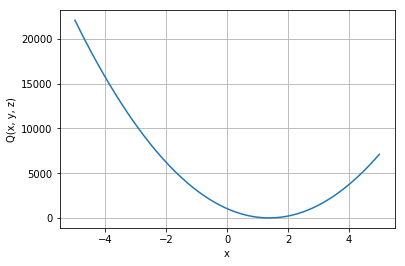

In [138]:
# итерация 1
x = np.linspace(-5, 5, 201)
y = 10 * x - 14
z = x + 2 * y - 1

plt.plot(x, Q(x, y, z))
plt.xlabel('x')
plt.ylabel('Q(x, y, z)')
plt.grid(True)
plt.show()

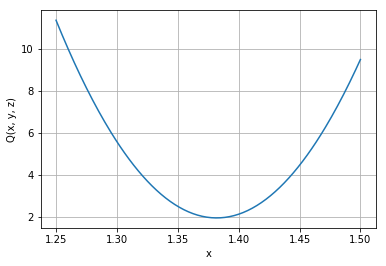

In [141]:
# итерация 2
x = np.linspace(1.25, 1.5, 201)
y = 10 * x - 14
z = x + 2 * y - 1

plt.plot(x, Q(x, y, z))
plt.xlabel('x')
plt.ylabel('Q(x, y, z)')
plt.grid(True)
plt.show()

In [148]:
# исходя из визуального анализа гарафика:
x = 1.37
y = 10 * x - 14
z = x + 2 * y - 1

X1 = np.array([x, y, z])
print(X1)

[ 1.37 -0.3  -0.23]


In [149]:
# нормальное псевдорешение числовым методом:
X2 = np.linalg.lstsq(A, B, rcond=None)[0]
print(X2)

[ 1.38191882 -0.18081181  0.0202952 ]


In [150]:
# проверка:
print(np.dot(A, X1))
print(np.dot(A, X2))

[ 1. 12.]
[ 1. 12.]


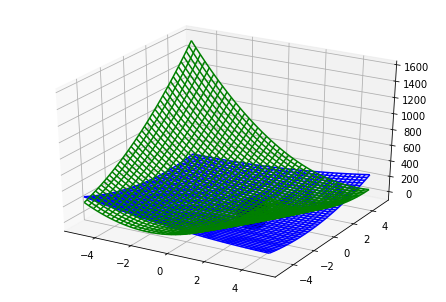

In [151]:
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

fig = figure()
ax = Axes3D(fig)
X = np.linspace(-5, 5, 201)
Y = np.linspace(-5, 5, 201)
X, Y = np.meshgrid(X, Y)

ax.plot_wireframe(X, Y, Q(X, Y, X + 2*Y - 1), color='blue')
ax.plot_wireframe(X, Y, Q(X, Y, 6 - 4*X + 2.5*Y), color='green')
ax.scatter(1.38191882, -0.18081181,  0.0202952,'z',1000,'black');

6. Найдите одно из псевдорешений вырожденной системы:
$$\begin{equation*}
\begin{vmatrix}
\mathbf{1} ; \mathbf{2} ; \mathbf{3} \\
\mathbf{4} ; \mathbf{5} ; \mathbf{6} \\
\mathbf{7} ; \mathbf{8} ; \mathbf{9}
\end{vmatrix} * X = 
\begin{vmatrix}
\mathbf{2} \\
\mathbf{5} \\
\mathbf{11}
\end{vmatrix}
\end{equation*}$$

Попробуйте также отыскать и нормальное псевдорешение.